# A larger scale ...

In [1]:
import pathlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import mpm_py

Welcome to MPM_Py!


In [70]:
def SetupRegularMesh(dx,dy,nx,ny):
    '''
    Generates the Coordinate Matrix X_I = [ [x_1,y_1], [x_nx+1,y_ny+1]] and the element connectrivity matrix Elmt = [[n1, n2 ,n3 ,n4]_1, ... ,[n1, n2 ,n3 ,n4]_nx*ny].
    '''
    x_I = np.zeros((nx+1)*(ny+1)*2)
    x_I.resize((nx+1)*(ny+1),2)
    ii = 0
    for j in range(ny+1):
        for i in range(nx+1):
            x = np.array([(dx/nx)*i, (dy/ny)*j])
            x_I[ii] = x
            ii = ii + 1
    Elmt = np.zeros(nx*ny*4,dtype=np.int)
    Elmt.resize(nx*ny,4)
    ii = 0
    for ey in range(ny):
        for ex in range(nx):
            lower_start_node_index = ex + ey*(nx+1)
            elmt = np.array([
                lower_start_node_index
                ,lower_start_node_index+1
                ,lower_start_node_index+nx+2
                ,lower_start_node_index+nx+1
                ],dtype=np.int)
            Elmt[ii] = elmt
            ii = ii + 1
    return x_I, Elmt

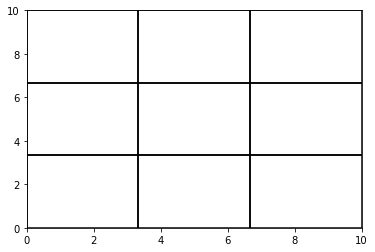

In [71]:
# Set up MPM Space
dt = 0.2
# Grid
x_I, Elmt = SetupRegularMesh(10,10,3,3)
G1 = mpm_py.Grid(x_I, Elmt)
G1.plot(plt.gca())
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

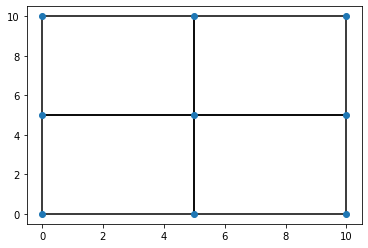

In [64]:
plt.plot(x_I[:,0],x_I[:,1],'o')
ax = plt.gca()
for i in range(len(Elmt)): 
    ax.add_patch(
        Polygon(x_I[Elmt[i]], True, 
        fc=(0.0,0.0,0.0,0.0),  ec=(0.0,0.0,0.0) , lw=1.5))
plt.show()